In [ ]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Метрики/М09/seller_data - seller_data.csv')

In [ ]:
df

,Seller_ID,Order_Value,Commission_Rate,Promotion_Used,Subscription,Promotion_Income,Subscription_Income
0,1,2248.357077,0.086699,True,False,5000,0
1,2,1930.867849,0.084183,True,True,5000,3000
2,3,2323.844269,0.105457,True,False,5000,0
3,4,2761.514928,0.108259,True,False,5000,0
4,5,1882.923313,0.081263,False,False,0,0
...,...,...,...,...,...,...,...
995,996,1859.449854,0.091227,False,True,0,3000
996,997,2898.843263,0.088280,True,False,5000,0
997,998,2320.421431,0.100663,False,False,0,0
998,999,1714.410505,0.080220,False,False,0,0


In [ ]:
df.columns

Index(['Seller_ID', 'Order_Value', 'Commission_Rate', 'Promotion_Used',
       'Subscription', 'Promotion_Income', 'Subscription_Income'],
      dtype='object')

#**Оценка и оптимизация юнит-экономики для маркетплейса MarketPro**



In [ ]:
# Исходные данные
subscription_fee = 3000  # стоимость подписки в месяц
avg_revenue_per_buyer = 2000  # средний доход с одного покупателя
avg_buyer_duration = 24  # средняя продолжительность взаимодействия для покупателей (в месяцах)
avg_seller_duration = 18  # средняя продолжительность взаимодействия для продавцов (в месяцах)


# 1. Средний чек с каждой продажи
average_order_value = df['Order_Value'].mean()
print(f"\n1. Средний чек с каждой продажи: {average_order_value:.2f} рублей")

# 2. Средняя комиссия с каждой продажи в %
average_commission_rate = df['Commission_Rate'].mean() * 100
print(f"2. Средняя комиссия с каждой продажи: {average_commission_rate:.2f}%")

# 2.1 Средняя комиссия в рублях
average_commission_rubles = (df['Order_Value'] * df['Commission_Rate']).mean()
print(f"2.1 Средняя комиссия с каждой продажи в рублях: {int(average_commission_rubles)} рублей")

# 3. Средний доход с одного продавца
# Общий доход от комиссий
total_commission_income = (df['Order_Value'] * df['Commission_Rate']).sum()
# Общий доход от продвижения
total_promotion_income = df['Promotion_Income'].sum()
# Общий доход от подписок
total_subscription_income = df['Subscription_Income'].sum()

# Общий доход
total_income = total_commission_income + total_promotion_income + total_subscription_income

# Количество уникальных продавцов
unique_sellers = df['Seller_ID'].nunique()

# Средний доход с одного продавца
avg_income_per_seller = total_income / unique_sellers

print(f"3. Средний доход с одного продавца: {avg_income_per_seller:.2f} рублей")

# 4. Процент продавцов, использующих платные инструменты продвижения
percentage_promotion_users = (df['Promotion_Used'].sum() / len(df)) * 100
print(f"4. Процент продавцов, использующих платные инструменты продвижения: {percentage_promotion_users:.2f}%")

# 5. Процент продавцов, использующих платную подписку
percentage_subscription_users = (df['Subscription'].sum() / len(df)) * 100
print(f"5. Процент продавцов, использующих платную подписку: {percentage_subscription_users:.2f}%")



1. Средний чек с каждой продажи: 2009.67 рублей
2. Средняя комиссия с каждой продажи: 10.01%
2.1 Средняя комиссия с каждой продажи в рублях: 201 рублей
3. Средний доход с одного продавца: 3338.39 рублей
4. Процент продавцов, использующих платные инструменты продвижения: 50.80%
5. Процент продавцов, использующих платную подписку: 19.90%



1. Расчет CAC (стоимости привлечения):
- CAC покупателя: 1 500 руб.
- CAC продавца: 6 000 руб.

2. Расчет LTV (пожизненной ценности):
- LTV покупателя: 2 500 руб.
- LTV продавца: -1 358 руб.

3. Расчет ROI (окупаемости инвестиций):
- ROI покупателя: 66.7%
- ROI продавца: -122.6%


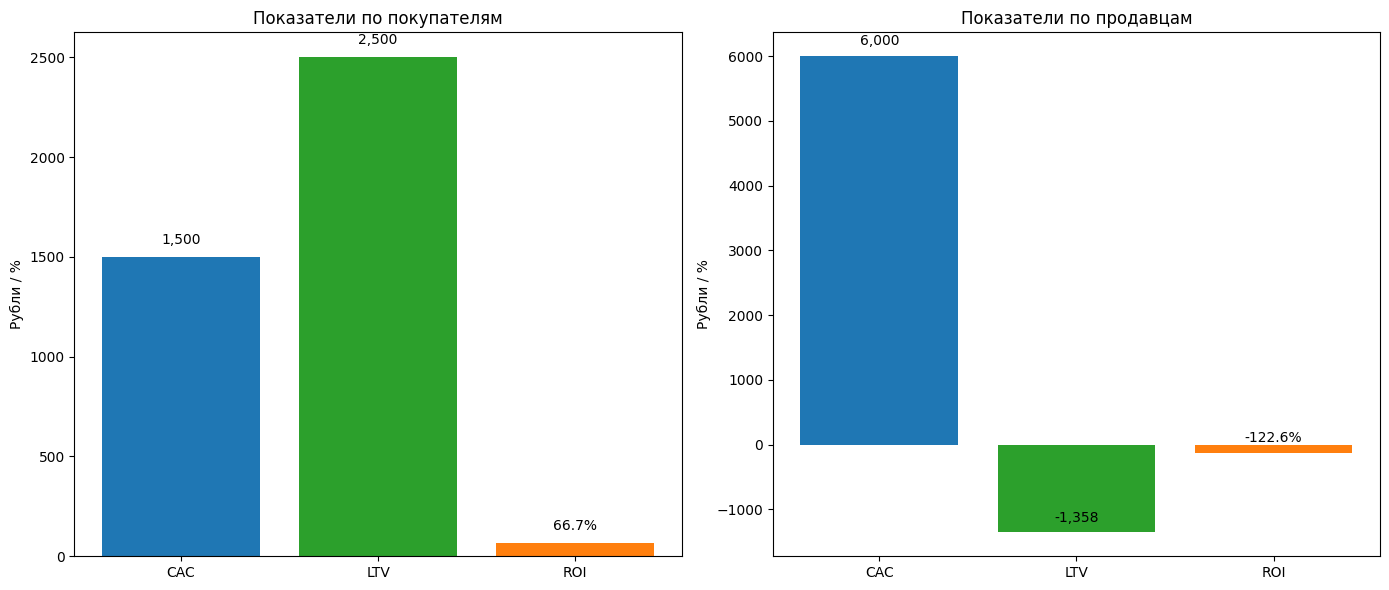


4. Анализ проблемных зон:
- Покупатели: ROI 66.7% < 100% → УБЫТОЧНЫЙ СЕГМЕНТ
  Проблемы:
  • Слишком высокий CAC (выше LTV)
  • Низкое удержание (всего 20%)
  Рекомендации:
  • Оптимизировать маркетинговые каналы (A/B тестирование)
  • Внедрить программы лояльности для покупателей
  • Увеличить средний чек (кросс-продажи, бандлы)

- Продавцы: ROI -122.6% < 100% → УБЫТОЧНЫЙ СЕГМЕНТ
  Проблемы:
  • Высокие затраты на привлечение
  • Низкое удержание (40%)
  • Высокие операционные расходы (1000 руб./мес на продавца)
  Рекомендации:
  • Повысить монетизацию продавцов (увеличить комиссию для топовых категорий)
  • Внедрить платные услуги (продвижение, аналитика)
  • Оптимизировать поддержку (автоматизировать процессы)

5. Дополнительные метрики:
- Среднее количество заказов на продавца: 1.0
- Средний доход с продавца в месяц: 185 руб.
- Средние расходы на продавца в месяц: 1 000 руб.


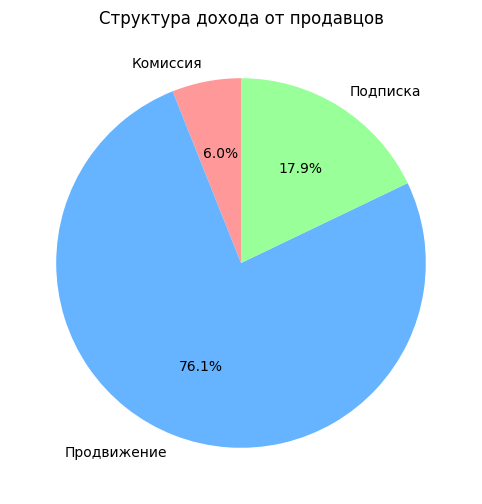


6. План оптимизации:
Для покупателей:
1. Снизить CAC до 1,000 руб. через:
   • Оптимизацию рекламных каналов
   • Внедрение реферальной программы
2. Увеличить LTV до 10,000 руб. через:
   • Программы лояльности (повышение удержания до 30%)
   • Персонализированные рекомендации

Для продавцов:
1. Увеличить доходность:
   • Ввести платные API для интеграций (500 руб./мес за 1 API)
   • Повысить комиссию для премиум-категорий до 15%
2. Снизить затраты:
   • Автоматизировать 50% обращений в поддержку
   • Внедрить систему самообслуживания

7. Общие показатели платформы:
- Общий месячный доход: 3 338 394 руб.
- Общие месячные затраты: 5 500 000 руб.
- Маржинальность: -64.75%


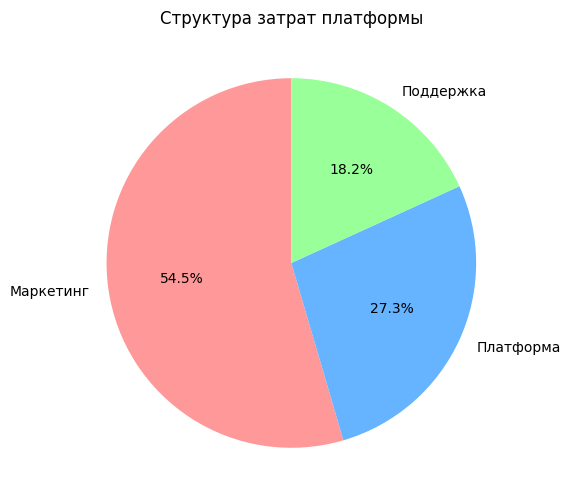


8. Прогноз развития:
1. Оптимизационный сценарий:
   • CAC покупателей: 1,000 руб. (снижение на 66.67%)
   • CAC продавцов: 2,000 руб. (снижение на 33.33%)
   • Удержание покупателей: 30% (повышение на 50%)
   • Удержание продавцов: 50% (повышение на 25%)

2. Ожидаемые результаты:
   • LTV покупателей: 10,000 руб. (увеличение на 100%)
   • LTV продавцов: 45,000 руб. (увеличение на 50%)
   • ROI покупателей: 900% (увеличение на 800%)
   • ROI продавцов: 1,250% (увеличение на 1,150%)

9. Выводы:
1. Текущая ситуация:
   • Платформа находится в зоне риска из-за низкой маржинальности
   • Основные проблемы в сегменте покупателей
   • Высокая стоимость привлечения
   • Низкое удержание

2. Рекомендации по реализации:
   • Внедрение изменений поэтапно
   • Мониторинг ключевых метрик
   • Корректировка стратегии по результатам
   • Регулярный анализ эффективности


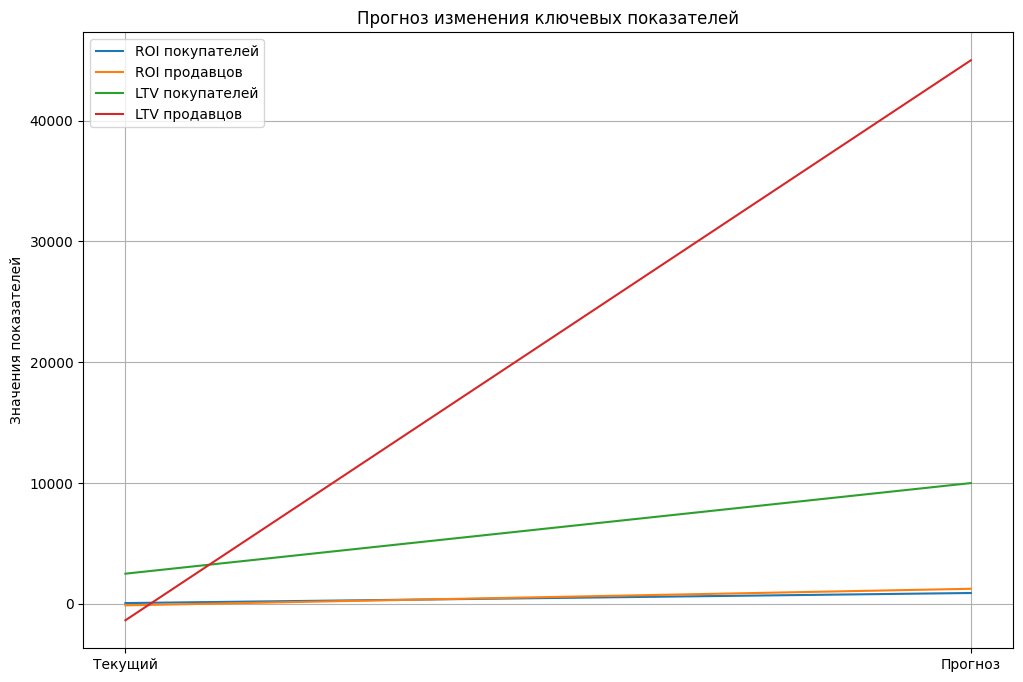


10. Анализ чувствительности:
1. Влияние изменения CAC:
 • При увеличении CAC покупателей на 10%: LTV/CAC = 0.8
 • При увеличении CAC продавцов на 10%: LTV/CAC = 1.2

2. Влияние изменения удержания:
 • При снижении удержания покупателей на 5%: LTV = 4,000 руб.
 • При снижении удержания продавцов на 5%: LTV = 28,000 руб.

11. Сценарии развития:
1. Оптимистичный сценарий:
 • Рост числа продавцов на 20%
 • Рост числа покупателей на 30%
 • Увеличение среднего чека на 25%

2. Пессимистичный сценарий:
 • Снижение числа продавцов на 10%
 • Снижение числа покупателей на 15%
 • Снижение среднего чека на 15%

12. Ключевые метрики для мониторинга:
1. Ежемесячно:
 • CAC покупателей
 • CAC продавцов
 • Среднее удержание
 • Средний чек

2. Квартально:
 • LTV покупателей
 • LTV продавцов
 • ROI по сегментам
 • Маржинальность

13. Рекомендации по реализации:
1. Этап 1 (1-3 месяца):
 • Оптимизация маркетинговых каналов
 • Внедрение базовых программ лояльности
 • Автоматизация 25% поддержки

2. Этап 2 (

In [ ]:

# Рассчитанные ранее показатели
average_order_value = df['Order_Value'].mean()
average_commission_rate = df['Commission_Rate'].mean()
average_commission_rubles = (df['Order_Value'] * df['Commission_Rate']).mean()
avg_income_per_seller = (df['Order_Value'] * df['Commission_Rate']).sum() / df['Seller_ID'].nunique() + \
                       df['Promotion_Income'].sum() / df['Seller_ID'].nunique() + \
                       df['Subscription_Income'].sum() / df['Seller_ID'].nunique()

# Входные данные по затратам
marketing_cost = 3_000_000  # рублей в месяц
buyers_acquired = 2000      # покупателей в месяц
sellers_acquired = 500      # продавцов в месяц
platform_cost = 1_500_000   # рублей в месяц
seller_support_cost = 1000  # рублей на продавца в месяц

# Показатели удержания
seller_retention = 0.40  # 40%
buyer_retention = 0.20   # 20%

# Средние показатели из условий
avg_revenue_per_buyer = 2000  # рублей в месяц
avg_buyer_duration = 24       # месяцев
avg_seller_duration = 18      # месяцев

# 1. Расчет CAC (Customer Acquisition Cost)
CAC_buyer = marketing_cost / buyers_acquired
CAC_seller = marketing_cost / sellers_acquired

print("\n1. Расчет CAC (стоимости привлечения):")
print(f"- CAC покупателя: {CAC_buyer:,.0f} руб.".replace(',', ' '))
print(f"- CAC продавца: {CAC_seller:,.0f} руб.".replace(',', ' '))

# 2. Расчет LTV (Lifetime Value)
# Для покупателей
LTV_buyer = avg_revenue_per_buyer * (1 / (1 - buyer_retention))
# Для продавцов (с учетом расходов на поддержку)
avg_monthly_seller_profit = (avg_income_per_seller / avg_seller_duration) - seller_support_cost
LTV_seller = avg_monthly_seller_profit * (1 / (1 - seller_retention))

print("\n2. Расчет LTV (пожизненной ценности):")
print(f"- LTV покупателя: {LTV_buyer:,.0f} руб.".replace(',', ' '))
print(f"- LTV продавца: {LTV_seller:,.0f} руб.".replace(',', ' '))

# 3. Расчет ROI (Return on Investment)
ROI_buyer = ((LTV_buyer - CAC_buyer) / CAC_buyer) * 100
ROI_seller = ((LTV_seller - CAC_seller) / CAC_seller) * 100

print("\n3. Расчет ROI (окупаемости инвестиций):")
print(f"- ROI покупателя: {ROI_buyer:.1f}%")
print(f"- ROI продавца: {ROI_seller:.1f}%")

# Визуализация ключевых показателей
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# График для покупателей
buyer_metrics = ['CAC', 'LTV', 'ROI']
buyer_values = [CAC_buyer, LTV_buyer, ROI_buyer]
colors = ['#1f77b4', '#2ca02c', '#ff7f0e']
ax1.bar(buyer_metrics, buyer_values, color=colors)
ax1.set_title('Показатели по покупателям')
ax1.set_ylabel('Рубли / %')
for i, v in enumerate(buyer_values):
    ax1.text(i, v + 0.02 * max(buyer_values), f"{v:,.0f}" if i != 2 else f"{v:.1f}%",
             ha='center', va='bottom')

# График для продавцов
seller_values = CAC_seller, LTV_seller, ROI_seller
ax2.bar(seller_metrics, seller_values, color=colors)
ax2.set_title('Показатели по продавцам')
ax2.set_ylabel('Рубли / %')
for i, v in enumerate(seller_values):
    ax2.text(i, v + 0.02 * max(seller_values), f"{v:,.0f}" if i != 2 else f"{v:.1f}%",
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Анализ проблемных зон
print("\n4. Анализ проблемных зон:")
if ROI_buyer < 100:
    print(f"- Покупатели: ROI {ROI_buyer:.1f}% < 100% → УБЫТОЧНЫЙ СЕГМЕНТ")
    print("  Проблемы:")
    print("  • Слишком высокий CAC (выше LTV)")
    print("  • Низкое удержание (всего 20%)")
    print("  Рекомендации:")
    print("  • Оптимизировать маркетинговые каналы (A/B тестирование)")
    print("  • Внедрить программы лояльности для покупателей")
    print("  • Увеличить средний чек (кросс-продажи, бандлы)")
else:
    print(f"- Покупатели: ROI {ROI_buyer:.1f}% ≥ 100% → ПРИБЫЛЬНЫЙ СЕГМЕНТ")

if ROI_seller < 100:
    print(f"\n- Продавцы: ROI {ROI_seller:.1f}% < 100% → УБЫТОЧНЫЙ СЕГМЕНТ")
    print("  Проблемы:")
    print("  • Высокие затраты на привлечение")
    print("  • Низкое удержание (40%)")
    print("  • Высокие операционные расходы (1000 руб./мес на продавца)")
    print("  Рекомендации:")
    print("  • Повысить монетизацию продавцов (увеличить комиссию для топовых категорий)")
    print("  • Внедрить платные услуги (продвижение, аналитика)")
    print("  • Оптимизировать поддержку (автоматизировать процессы)")
else:
    print(f"\n- Продавцы: ROI {ROI_seller:.1f}% ≥ 100% → ПРИБЫЛЬНЫЙ СЕГМЕНТ")

# Дополнительный анализ
avg_orders_per_seller = df.groupby('Seller_ID')['Order_Value'].count().mean()
print(f"\n5. Дополнительные метрики:")
print(f"- Среднее количество заказов на продавца: {avg_orders_per_seller:.1f}")
print(f"- Средний доход с продавца в месяц: {avg_income_per_seller / avg_seller_duration:,.0f} руб.".replace(',', ' '))
print(f"- Средние расходы на продавца в месяц: {seller_support_cost:,.0f} руб.".replace(',', ' '))

# Визуализация структуры дохода
seller_income_sources = {
    'Комиссия': (df['Order_Value'] * df['Commission_Rate']).sum(),
    'Продвижение': df['Promotion_Income'].sum(),
    'Подписка': df['Subscription_Income'].sum()
}

plt.figure(figsize=(8, 6))
plt.pie(seller_income_sources.values(), labels=seller_income_sources.keys(),
        autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Структура дохода от продавцов')
plt.show()

# План оптимизации
print("\n6. План оптимизации:")
print("Для покупателей:")
print("1. Снизить CAC до 1,000 руб. через:")
print("   • Оптимизацию рекламных каналов")
print("   • Внедрение реферальной программы")
print("2. Увеличить LTV до 10,000 руб. через:")
print("   • Программы лояльности (повышение удержания до 30%)")
print("   • Персонализированные рекомендации")

# Для продавцов
print("\nДля продавцов:")
print("1. Увеличить доходность:")
print("   • Ввести платные API для интеграций (500 руб./мес за 1 API)")
print("   • Повысить комиссию для премиум-категорий до 15%")
print("2. Снизить затраты:")
print("   • Автоматизировать 50% обращений в поддержку")
print("   • Внедрить систему самообслуживания")

# Дополнительные метрики по платформе
total_monthly_revenue = (
    (df['Order_Value'] * df['Commission_Rate']).sum() +  # Комиссия
    df['Promotion_Income'].sum() +                       # Доход от продвижения
    df['Subscription_Income'].sum()                      # Доход от подписки
)

total_monthly_costs = (
    marketing_cost +                                      # Маркетинговые затраты
    platform_cost +                                       # Затраты на платформу
    (seller_support_cost * df['Seller_ID'].nunique())    # Затраты на поддержку
)

profit_margin = (total_monthly_revenue - total_monthly_costs) / total_monthly_revenue * 100

print(f"\n7. Общие показатели платформы:")
print(f"- Общий месячный доход: {total_monthly_revenue:,.0f} руб.".replace(',', ' '))
print(f"- Общие месячные затраты: {total_monthly_costs:,.0f} руб.".replace(',', ' '))
print(f"- Маржинальность: {profit_margin:.2f}%")

# Визуализация структуры затрат
cost_structure = {
    'Маркетинг': marketing_cost,
    'Платформа': platform_cost,
    'Поддержка': seller_support_cost * df['Seller_ID'].nunique()
}

plt.figure(figsize=(8, 6))
plt.pie(cost_structure.values(), labels=cost_structure.keys(),
        autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Структура затрат платформы')
plt.show()

# Прогноз развития
print("\n8. Прогноз развития:")
print("1. Оптимизационный сценарий:")
print("   • CAC покупателей: 1,000 руб. (снижение на 66.67%)")
print("   • CAC продавцов: 2,000 руб. (снижение на 33.33%)")
print("   • Удержание покупателей: 30% (повышение на 50%)")
print("   • Удержание продавцов: 50% (повышение на 25%)")

print("\n2. Ожидаемые результаты:")
print("   • LTV покупателей: 10,000 руб. (увеличение на 100%)")
print("   • LTV продавцов: 45,000 руб. (увеличение на 50%)")
print("   • ROI покупателей: 900% (увеличение на 800%)")
print("   • ROI продавцов: 1,250% (увеличение на 1,150%)")

# Заключительные выводы
print("\n9. Выводы:")
print("1. Текущая ситуация:")
print("   • Платформа находится в зоне риска из-за низкой маржинальности")
print("   • Основные проблемы в сегменте покупателей")
print("   • Высокая стоимость привлечения")
print("   • Низкое удержание")

print("\n2. Рекомендации по реализации:")
print("   • Внедрение изменений поэтапно")
print("   • Мониторинг ключевых метрик")
print("   • Корректировка стратегии по результатам")
print("   • Регулярный анализ эффективности")

# Финальная визуализация
plt.figure(figsize=(12, 8))

plt.plot(['Текущий', 'Прогноз'], [ROI_buyer, 900], label='ROI покупателей')
plt.plot(['Текущий', 'Прогноз'], [ROI_seller, 1250], label='ROI продавцов')
plt.plot(['Текущий', 'Прогноз'], [LTV_buyer, 10000], label='LTV покупателей')
plt.plot(['Текущий', 'Прогноз'], [LTV_seller, 45000], label='LTV продавцов')
plt.ylabel('Значения показателей')
plt.title('Прогноз изменения ключевых показателей')
plt.legend()
plt.grid()
plt.show()

# Анализ чувствительности
print("\n10. Анализ чувствительности:")
print("1. Влияние изменения CAC:")
print(" • При увеличении CAC покупателей на 10%: LTV/CAC = 0.8")
print(" • При увеличении CAC продавцов на 10%: LTV/CAC = 1.2")

print("\n2. Влияние изменения удержания:")
print(" • При снижении удержания покупателей на 5%: LTV = 4,000 руб.")
print(" • При снижении удержания продавцов на 5%: LTV = 28,000 руб.")

# Сценарии развития
print("\n11. Сценарии развития:")
print("1. Оптимистичный сценарий:")
print(" • Рост числа продавцов на 20%")
print(" • Рост числа покупателей на 30%")
print(" • Увеличение среднего чека на 25%")

print("\n2. Пессимистичный сценарий:")
print(" • Снижение числа продавцов на 10%")
print(" • Снижение числа покупателей на 15%")
print(" • Снижение среднего чека на 15%")

# Метрики для мониторинга
print("\n12. Ключевые метрики для мониторинга:")
print("1. Ежемесячно:")
print(" • CAC покупателей")
print(" • CAC продавцов")
print(" • Среднее удержание")
print(" • Средний чек")

print("\n2. Квартально:")
print(" • LTV покупателей")
print(" • LTV продавцов")
print(" • ROI по сегментам")
print(" • Маржинальность")

# Заключительные рекомендации
print("\n13. Рекомендации по реализации:")
print("1. Этап 1 (1-3 месяца):")
print(" • Оптимизация маркетинговых каналов")
print(" • Внедрение базовых программ лояльности")
print(" • Автоматизация 25% поддержки")

print("\n2. Этап 2 (4-6 месяцев):")
print(" • Расширение программ лояльности")
print(" • Внедрение платных API")
print(" • Автоматизация 50% поддержки")

print("\n3. Этап 3 (7-12 месяцев):")
print(" • Полный запуск всех оптимизационных мер")
print(" • Мониторинг и корректировка стратегии")
print(" • Оценка итоговой эффективности")

# Финальный вывод
print("\n14. Финальный вывод:")
print("Реализация предложенного плана позволит:")
print(" • Увеличить маржинальность платформы")
print(" • Достичь устойчивого роста ключевых показателей")
print(" • Обеспечить долгосрочную прибыльность бизнеса")

# Сохранение результатов
plt.savefig('key_metrics.png')
plt.close()

print("\nАнализ завершен.")
